<a href="https://colab.research.google.com/github/KendallScott/Capstone_alt/blob/main/Data_Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
https://geemap.org/notebooks/114_dynamic_world/


# Imports and Setup

In [1]:
!pip -q install --upgrade folium
!pip -q install geopandas
!pip -q install geojson
!pip -q install eeconvert

In [2]:
# reminder that if you are installing libraries in a Google Colab instance you will be prompted to restart your kernal

try:
    import geemap, ee
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
    import geemap, ee

In [3]:
pip install eemont

In [4]:
# Standard imports
import requests
import json

import pandas as pd
import numpy as np
from PIL import Image

# Geospatial processing packages
import geopandas as gpd
import geojson

import shapely
from shapely.geometry import box

# Mapping and plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import ee
import eeconvert as eec
import geemap
import folium
import eemont

import geopandas as gpd
from shapely.geometry import shape

### Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Authenticate Google Earth Engine
Make sure you have signed up for access to Google Earth Engine at https://signup.earthengine.google.com/#!/. Once your request has been approved, you should be able to access Google Earth Engine at https://code.earthengine.google.com/.

In [6]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=WA0IYwS3a2JM4suKn_z4bRWS5GAykHP1tZolsuorGxQ&tc=zMsO0Zh9s1ALr7TtdRw-P1RjWVBF5htbbXNk1LFGLDI&cc=chdlSXd3qYsG-sV2dO9yif7UhIzDRyHeQ07yEWkkcCQ

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AZEOvhVyBG-AgWPkkvVJSQvgGz6Ve4pBUJZbuBLhDLnt5IeldcTkYN2_2Dw

Successfully saved authorization token.


In [7]:
# Read the GeoJSON file
mines = gpd.read_file('/content/drive/MyDrive/OSMRE_GEOMINE_GEOJSON.geojson')


# Read data using GeoPandas
print("Data dimensions: {}".format(mines.shape))
mines.sample(3)

Data dimensions: (25124, 31)


,OBJECTID,permittee,company,coalmine_op_status,mine_name,permit_id,msha_id,state_tribe_mine_id,national_id,coal_bed_names,...,mountaintop,steep_slope,highwall,auger,comment,contact,information_link,shape_Length,shape_Area,geometry
19890,19891,LEXINGTON COAL COMPANY LLC,LEXINGTON COAL COMPANY LLC,1,Long Pole Energy,8984597,19269,NaN,KY8984597,ALMA,...,0.0,0.0,0.0,0.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,6543.968844,1.374015e+05,"MULTIPOLYGON (((-9151610.643 4526396.191, -915..."
4187,4188,NaN,,4,NaN,0130110,NaN,NaN,KY0130110,,...,0.0,0.0,0.0,0.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,7261.671626,4.029561e+05,"MULTIPOLYGON (((-9265633.057 4503419.900, -926..."
13095,13096,MAYO RESOURCES INC,MAYO RESOURCES INC,1,NaN,8585078,19677,NaN,KY8585078,"HADDIX, RIDER, FIRECLAY",...,0.0,0.0,0.0,1.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,11840.112167,1.084231e+06,"MULTIPOLYGON (((-9214153.010 4556222.140, -921..."


In [8]:
mines.sample(10)

,OBJECTID,permittee,company,coalmine_op_status,mine_name,permit_id,msha_id,state_tribe_mine_id,national_id,coal_bed_names,...,mountaintop,steep_slope,highwall,auger,comment,contact,information_link,shape_Length,shape_Area,geometry
13656,13657,HAP HAZARD CONST CO,HAP HAZARD CONST CO,7,NaN,8265020,NaN,NaN,KY8265020,MANCHESTER,...,0.0,0.0,0.0,0.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,909.643063,1.766574e+04,"MULTIPOLYGON (((-9322350.685 4468141.098, -932..."
3054,3055,B. V. W. Coal Company,B. V. W. Coal Company,5,NaN,2388,NaN,NaN,VA2388,NaN,...,NaN,NaN,NaN,NaN,Bond Forfeiture.,1,NaN,415.442861,6.894996e+03,"MULTIPOLYGON (((-9189782.553 4459590.796, -918..."
4534,4535,CHARLIE HUMBLE,CHARLIE HUMBLE,7,NaN,8880022,NaN,NaN,KY8880022,TOM COOPER,...,0.0,0.0,0.0,0.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,749.352397,1.503709e+04,"MULTIPOLYGON (((-9264090.347 4553310.932, -926..."
17509,17510,MINE RITE COAL CO INC,MINE RITE COAL CO INC,7,NaN,8880079,14015,NaN,KY8880079,"MUD SEAM, VAN LEAR",...,0.0,0.0,0.0,1.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,26933.185320,9.872395e+05,"MULTIPOLYGON (((-9239262.823 4573803.079, -923..."
986,987,HIGH TOP COAL CO,HIGH TOP COAL CO,7,MINE 10,78-069,NaN,NaN,TN78-069,NaN,...,NaN,NaN,NaN,NaN,NaN,4,https://www.osmre.gov/,11986.253442,2.150080e+05,"MULTIPOLYGON (((-9373381.149 4363730.650, -937..."
5444,5445,NaN,,4,NaN,0365107,NaN,NaN,KY0365107,,...,0.0,0.0,0.0,0.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,367.241225,5.939850e+03,"MULTIPOLYGON (((-9212371.581 4532969.664, -921..."
18199,18200,REEDY COAL CO INC,REEDY COAL CO INC,7,NaN,8675190,16367,NaN,KY8675190,"FIRECLAY, HAZARD #4",...,0.0,0.0,0.0,0.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,39285.685551,9.953784e+06,"MULTIPOLYGON (((-9211877.422 4475227.717, -921..."
6879,6880,NaN,,4,NaN,0675023,NaN,NaN,KY0675023,,...,0.0,0.0,0.0,0.0,NaN,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...,20147.653297,1.577171e+05,"MULTIPOLYGON (((-9245566.905 4422907.031, -924..."
22173,22174,TYGART COAL COMPANY,NaN,7,NA,O000585,NaN,NaN,WVO000585,NaN,...,NaN,NaN,NaN,NaN,NaN,2,https://dep.wv.gov/dmr/Pages/default.aspx,1464.884386,4.615515e+04,"MULTIPOLYGON (((-9015939.050 4621787.618, -901..."
2601,2602,JUDO MINING COMPANY,JUDO MINING COMPANY,4,8 - 9B,75-215,NaN,NaN,TN75-215,NaN,...,NaN,NaN,NaN,NaN,NaN,4,https://www.osmre.gov/,16540.986791,1.860900e+06,"MULTIPOLYGON (((-9488727.323 4285516.307, -948..."


In [9]:
mines = mines.drop(columns=['permittee'])
mines = mines.drop(columns=['mine_name'])
mines = mines.drop(columns=['msha_id'])
mines = mines.drop(columns=['state_tribe_mine_id'])
mines = mines.drop(columns=['mountaintop'])
mines = mines.drop(columns=['steep_slope'])
mines = mines.drop(columns=['highwall'])
mines = mines.drop(columns=['auger'])
mines = mines.drop(columns=['comment'])
mines = mines.drop(columns=['coal_bed_names'])
mines = mines.drop(columns=['date_of_map'])
mines = mines.drop(columns=['inspectable_unit_status'])
mines = mines.drop(columns=['permit_approval_date'])
mines = mines.drop(columns=['edit_date'])
mines = mines.drop(columns=['area_mine'])
mines = mines.drop(columns=['contour'])
mines = mines.drop(columns=['permit_application_type'])
mines = mines.drop(columns=['reported_area'])
mines = mines.drop(columns=['permit_application_date'])

mines = mines.rename(columns={'OBJECTID': 'shapeName'})

In [10]:
mines

,shapeName,company,coalmine_op_status,permit_id,national_id,post_smcra,calculated_area,contact,information_link,shape_Length,shape_Area,geometry
0,1,HIGGINS COAL CO INC,7,2404,TN2404,1.0,2.220938,4,https://www.osmre.gov/,1220.769913,1.354382e+04,"MULTIPOLYGON (((-9515951.177 4212750.257, -951..."
1,2,MIDNIGHT COAL CO,7,2405,TN2405,1.0,2.752046,4,https://www.osmre.gov/,860.404674,1.678249e+04,"MULTIPOLYGON (((-9516024.476 4212708.540, -951..."
2,3,META ELKHORN MINING CO INC,7,2756,TN2756,1.0,270.299198,4,https://www.osmre.gov/,7219.650616,1.689153e+06,"MULTIPOLYGON (((-9459511.615 4347543.957, -945..."
3,4,JORDAN BROTHERS COAL CO INC,7,2497,TN2497,1.0,3.507990,4,https://www.osmre.gov/,688.042643,2.188255e+04,"MULTIPOLYGON (((-9372128.011 4337061.595, -937..."
4,5,DOUBLE Q INC,7,2284023,TN2284023,1.0,13.751147,4,https://www.osmre.gov/,7994.318732,8.636343e+04,"MULTIPOLYGON (((-9344712.695 4372890.512, -934..."
...,...,...,...,...,...,...,...,...,...,...,...,...
25119,25120,Justice Coal Of Alabama LLC,1,P3946,ALP3946,1.0,154.872159,8,https://surface-mining.alabama.gov/,5370.984081,9.330482e+05,"MULTIPOLYGON (((-9540804.196 4143151.210, -954..."
25120,25121,Justice Coal Of Alabama LLC,1,P3946,ALP3946,1.0,2.410359,8,https://surface-mining.alabama.gov/,534.608228,1.452293e+04,"MULTIPOLYGON (((-9541424.447 4142622.814, -954..."
25121,25122,Justice Coal Of Alabama LLC,1,P3946,ALP3946,1.0,2.430763,8,https://surface-mining.alabama.gov/,507.253927,1.464629e+04,"MULTIPOLYGON (((-9540236.664 4142842.258, -954..."
25122,25123,Justice Coal Of Alabama LLC,1,P3946,ALP3946,1.0,116.325330,8,https://surface-mining.alabama.gov/,4223.617167,7.008642e+05,"MULTIPOLYGON (((-9540725.233 4143212.597, -954..."


In [11]:
# Get the shape geometry for Tennesssee mines
region = eec.gdfToFc(mines)

In [12]:
df = pd.DataFrame()

In [13]:
mines_exploded=mines.explode()
mines_exploded

<ipython-input-13-9f8c0177ef78>:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  mines_exploded=mines.explode()


shapeName                      company  coalmine_op_status permit_id  \
0     0          1          HIGGINS COAL CO INC                   7      2404   
1     0          2             MIDNIGHT COAL CO                   7      2405   
2     0          3   META ELKHORN MINING CO INC                   7      2756   
3     0          4  JORDAN BROTHERS COAL CO INC                   7      2497   
      1          4  JORDAN BROTHERS COAL CO INC                   7      2497   
...            ...                          ...                 ...       ...   
25119 0      25120  Justice Coal Of Alabama LLC                   1     P3946   
25120 0      25121  Justice Coal Of Alabama LLC                   1     P3946   
25121 0      25122  Justice Coal Of Alabama LLC                   1     P3946   
25122 0      25123  Justice Coal Of Alabama LLC                   1     P3946   
25123 0      25124  Justice Coal Of Alabama LLC                   1     P3946   

        national_id  post_smcra  calculated_area  contact  \
0     0      TN2404         1.0         2.220938        4   
1     0      TN2405         1.0         2.752046        4   
2     0      TN2756         1.0       270.299198        4   
3     0      TN2497         1.0         3.507990        4   
      1      TN2497         1.0         3.507990        4   
...             ...         ...              ...      ...   
25119 0     ALP3946         1.0       154.872159        8   
25120 0     ALP3946         1.0         2.410359        8   
25121 0     ALP3946         1.0         2.430763        8   
25122 0     ALP3946         1.0       116.325330        8   
25123 0     ALP3946         1.0        66.036976        8   

                            information_link  shape_Length    shape_Area  \
0     0               https://www.osmre.gov/   1220.769913  1.354382e+04   
1     0               https://www.osmre.gov/    860.404674  1.678249e+04   
2     0               https://www.osmre.gov/   7219.650616  1.689153e+06   
3     0               https://www.osmre.gov/    688.042643  2.188255e+04   
      1               https://www.osmre.gov/    688.042643  2.188255e+04   
...                                      ...           ...           ...   
25119 0  https://surface-mining.alabama.gov/   5370.984081  9.330482e+05   
25120 0  https://surface-mining.alabama.gov/    534.608228  1.452293e+04   
25121 0  https://surface-mining.alabama.gov/    507.253927  1.464629e+04   
25122 0  https://surface-mining.alabama.gov/   4223.617167  7.008642e+05   
25123 0  https://surface-mining.alabama.gov/   3278.442601  3.979045e+05   

                                                  geometry  
0     0  POLYGON ((-9515951.177 4212750.257, -9515928.8...  
1     0  POLYGON ((-9516024.476 4212708.540, -9516019.2...  
2     0  POLYGON ((-9459511.615 4347543.957, -9459509.4...  
3     0  POLYGON ((-9372128.011 4337061.595, -9372159.8...  
      1  POLYGON ((-9372169.449 4337098.162, -9372176.4...  
...                                                    ...  
25119 0  POLYGON ((-9540804.196 4143151.210, -9540794.6...  
25120 0  POLYGON ((-9541424.447 4142622.814, -9541448.6...  
25121 0  POLYGON ((-9540236.664 4142842.258, -9540258.9...  
25122 0  POLYGON ((-9540725.233 4143212.597, -9540601.6...  
25123 0  POLYGON ((-9539594.620 4143493.033, -9539552.9...  

[54301 rows x 12 columns]

In [15]:
polygon = mines_exploded['geometry'].values[i]

In [21]:
dc = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterBounds(region).filterDate(i_date, f_date)


EEException: ignored

In [17]:
bandnames = dc.first().bandNames().filterBounds(polygon).getInfo()[:-1]

KeyboardInterrupt: ignored

In [28]:
polygon

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.MultiPolygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              [
                -9515951.17738361,
                4212750.256588563
              ],
              [
                -9515928.895640543,
                4212745.473957859
              ],
              [
                -9515904.529384093,
                4212746.656865455
              ],
              [
                -9515877.193008572,
                4212744.648252554
              ],
              [
                -9515864.51822719,
                4212741.123729929
              ],
              [
                -9515846.299010208,
                4212726.964139007
              ],
              [
                -9515761.470865542,
                4212706.98851075
              ],
              [
                -9515796.018587368,
                4212704.242993124
              ],
              [
                -9515854.09446026,
                4212717.665579304
              ],
              [
                -9515870.358164687,
                4212730.9943648875
              ],
              [
                -9515880.237328118,
                4212733.683782153
              ],
              [
                -9515904.028380876,
                4212735.427493349
              ],
              [
                -9515932.965666676,
                4212734.64408832
              ],
              [
                -9515950.490979202,
                4212738.721614502
              ],
              [
                -9515983.59989179,
                4212743.420944676
              ],
              [
                -9516101.827750906,
                4212712.583046675
              ],
              [
                -9516091.346183605,
                4212700.164366931
              ],
              [
                -9516095.390709575,
                4212694.1504283175
              ],
              [
                -9516118.092655338,
                4212689.9467013255
              ],
              [
                -9516137.379979178,
                4212696.224641636
              ],
              [
                -9516145.401430683,
                4212697.204447933
              ],
              [
                -9516172.388703963,
                4212694.4881304875
              ],
              [
                -9516220.688014083,
                4212667.755358845
              ],
              [
                -9516257.155448234,
                4212654.764475428
              ],
              [
                -9516292.204273274,
                4212645.363915071
              ],
              [
                -9516302.474039214,
                4212644.738411054
              ],
              [
                -9516319.621249313,
                4212649.739143163
              ],
              [
                -9516322.422767302,
                4212667.379056424
              ],
              [
                -9516305.734060146,
                4212681.892349616
              ],
              [
                -9516287.127340676,
                4212688.309890822
              ],
              [
                -9516256.44004364,
                4212702.526682101
              ],
              [
                -9516233.776498122,
                4212717.2897768915
              ],
              [
                -9516209.905144848,
                4212731.003464945
              ],
              [
                -9516181.599163102,
                4212735.986396939
              ],
              [
                -9516150.823565498,
                4212731.276666701
              ],
              [
                -9516082.129024424,
                4212731.474967971
              ],
              [
                -9515982.329583632,
                4212754.301114537
           

In [32]:
polygon.coords[:]

NotImplementedError: ignored

In [37]:
coordinates.bounds()

AttributeError: ignored

In [40]:
print(mines_exploded['geometry'].values[i])

POLYGON ((-9515951.17738361 4212750.256588563, -9515928.895640543 4212745.473957859, -9515904.529384093 4212746.656865455, -9515877.193008572 4212744.648252554, -9515864.51822719 4212741.123729929, -9515846.299010208 4212726.964139007, -9515761.470865542 4212706.98851075, -9515796.018587368 4212704.242993124, -9515854.09446026 4212717.665579304, -9515870.358164687 4212730.9943648875, -9515880.237328118 4212733.683782153, -9515904.028380876 4212735.427493349, -9515932.965666676 4212734.64408832, -9515950.490979202 4212738.721614502, -9515983.59989179 4212743.420944676, -9516101.827750906 4212712.583046675, -9516091.346183605 4212700.164366931, -9516095.390709575 4212694.1504283175, -9516118.092655338 4212689.9467013255, -9516137.379979178 4212696.224641636, -9516145.401430683 4212697.204447933, -9516172.388703963 4212694.4881304875, -9516220.688014083 4212667.755358845, -9516257.155448234 4212654.764475428, -9516292.204273274 4212645.363915071, -9516302.474039214 4212644.738411054, -951

In [42]:
ee.Geometry.Polygon(print(mines_exploded['geometry'].values[i]))

POLYGON ((-9515951.17738361 4212750.256588563, -9515928.895640543 4212745.473957859, -9515904.529384093 4212746.656865455, -9515877.193008572 4212744.648252554, -9515864.51822719 4212741.123729929, -9515846.299010208 4212726.964139007, -9515761.470865542 4212706.98851075, -9515796.018587368 4212704.242993124, -9515854.09446026 4212717.665579304, -9515870.358164687 4212730.9943648875, -9515880.237328118 4212733.683782153, -9515904.028380876 4212735.427493349, -9515932.965666676 4212734.64408832, -9515950.490979202 4212738.721614502, -9515983.59989179 4212743.420944676, -9516101.827750906 4212712.583046675, -9516091.346183605 4212700.164366931, -9516095.390709575 4212694.1504283175, -9516118.092655338 4212689.9467013255, -9516137.379979178 4212696.224641636, -9516145.401430683 4212697.204447933, -9516172.388703963 4212694.4881304875, -9516220.688014083 4212667.755358845, -9516257.155448234 4212654.764475428, -9516292.204273274 4212645.363915071, -9516302.474039214 4212644.738411054, -951

KeyError: ignored

In [43]:
coordinates = polygon.exterior.coords[:]

In [44]:
coordinates

[(-9515951.17738361, 4212750.256588563),
 (-9515928.895640543, 4212745.473957859),
 (-9515904.529384093, 4212746.656865455),
 (-9515877.193008572, 4212744.648252554),
 (-9515864.51822719, 4212741.123729929),
 (-9515846.299010208, 4212726.964139007),
 (-9515761.470865542, 4212706.98851075),
 (-9515796.018587368, 4212704.242993124),
 (-9515854.09446026, 4212717.665579304),
 (-9515870.358164687, 4212730.9943648875),
 (-9515880.237328118, 4212733.683782153),
 (-9515904.028380876, 4212735.427493349),
 (-9515932.965666676, 4212734.64408832),
 (-9515950.490979202, 4212738.721614502),
 (-9515983.59989179, 4212743.420944676),
 (-9516101.827750906, 4212712.583046675),
 (-9516091.346183605, 4212700.164366931),
 (-9516095.390709575, 4212694.1504283175),
 (-9516118.092655338, 4212689.9467013255),
 (-9516137.379979178, 4212696.224641636),
 (-9516145.401430683, 4212697.204447933),
 (-9516172.388703963, 4212694.4881304875),
 (-9516220.688014083, 4212667.755358845),
 (-9516257.155448234, 4212654.764475

In [77]:
projected_polygon_shape = np.asarray(coordinates)

In [82]:
projected_polygon_shape[3]

array([-9516011.05086805,  4212705.62110197])

In [81]:
projected_polygon_shape[2]

array([-9516017.02330639,  4212705.80530316])

In [69]:
projected_polygon_shape = projected_polygon.getInfo()


TypeError: ignored

In [76]:
projected_polygon_shape[i]

IndexError: ignored

In [64]:
projected_polygon[0]

EEException: ignored

In [89]:
ee.Geometry.MultiPolygon(projected_polygon_shape[z])

ValueError: ignored

In [94]:
projected_polygon_shape = np.asarray(coordinates)

In [95]:
projected_polygon_shape

array([[-9516024.47565424,  4212708.53992071],
       [-9516019.26532079,  4212705.39510052],
       [-9516017.02330639,  4212705.80530316],
       [-9516011.05086805,  4212705.62110197],
       [-9516006.00983568,  4212705.8285033 ],
       [-9516000.51340039,  4212703.83069047],
       [-9515989.42332918,  4212700.71307046],
       [-9515978.61155976,  4212697.87845226],
       [-9515964.62906998,  4212694.51123063],
       [-9515961.17744782,  4212694.21162871],
       [-9515954.26560344,  4212695.1592348 ],
       [-9515944.36663988,  4212696.27854198],
       [-9515936.05458651,  4212697.31224862],
       [-9515927.18162954,  4212698.51915637],
       [-9515911.77763063,  4212699.25756111],
       [-9515897.39433828,  4212701.18507349],
       [-9515888.71148253,  4212701.73647702],
       [-9515876.3884034 ,  4212702.30368067],
       [-9515862.66351528,  4212703.23848667],
       [-9515850.33543612,  4212704.76649649],
       [-9515838.20215822,  4212704.79559667],
       [-9515

In [97]:
pip install topojson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 11.1 MB/s eta 0:00:00


In [131]:
import topojson as tp
topo = tp.Topology(mines_exploded, prequantize=False)
mines_exploded = topo.toposimplify(2).to_gdf()

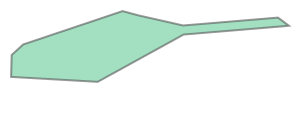

In [111]:
mines_exploded['geometry'].values[i]

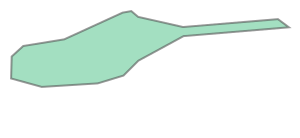

In [132]:
gdf_simplified['geometry'].values[i]

In [133]:
i=1

# Initial date of interest (inclusive).
i_date = '2021-01-01'
# Final date of interest (exclusive).
f_date = '2021-01-15'

# Extract the coordinates from the polygon
polygon = gdf_simplified['geometry'].values[i]

#needs adjusting for different geometry types
coordinates = polygon.exterior.coords[:]
projected_polygon_shape = np.asarray(coordinates)

projected_polygon_shape = projected_polygon_shape[z]
bound_object = ee.Geometry.MultiPolygon(coordinates)
bound_object = bound_object.bounds()

# Create an ee.Geometry object from the coordinates
polygon = ee.Geometry.MultiPolygon(coordinates)

# Get dynamic world image collection by asset ID
dc = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterDate(i_date, f_date)

# get band names, equal to column namesbandnames = dc.first().bandNames().getInfo()[:-1]

# Set the maxError parameter
max_error = 1  # Specify your desired maxError value

# Project the geometry coordinates
projected_polygon = polygon.transform('EPSG:4326', max_error)

#decrease scale to get more rows of data/granularity
ac = dc.getRegion(projected_polygon, scale=50000000000 ).getInfo()
df_constructor =pd.DataFrame(ac)

df_constructor.columns = df_constructor.iloc[0]
df_constructor = df_constructor.tail(-1)
df_constructor['company'] = mines_exploded['company'].values[i]
df_constructor['shapeName'] = mines_exploded['shapeName'].values[i]
df_constructor['start_date'] = i_date
df_constructor['end_Date'] = f_date
df = df.append(df_constructor)


EEException: ignored

In [130]:
i=0

# Initial date of interest (inclusive).
i_date = '2021-01-01'
# Final date of interest (exclusive).
f_date = '2021-01-15'

df_contructor = []
while i<=len(mines_exploded):
 try:
    # Extract the coordinates from the polygon
    polygon = gdf_simplified['geometry'].values[i]

    #needs adjusting for different geometry types
    coordinates = polygon.exterior.coords[:]
    projected_polygon_shape = np.asarray(coordinates)

    projected_polygon_shape = projected_polygon_shape[z]
    bound_object = ee.Geometry.MultiPolygon(coordinates)
    bound_object = bound_object.bounds()

    # Create an ee.Geometry object from the coordinates
    polygon = ee.Geometry.MultiPolygon(coordinates)

    # Get dynamic world image collection by asset ID
    dc = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterDate(i_date, f_date)

    # get band names, equal to column namesbandnames = dc.first().bandNames().getInfo()[:-1]

    # Set the maxError parameter
    max_error = 1  # Specify your desired maxError value

    # Project the geometry coordinates
    projected_polygon = polygon.transform('EPSG:4326', max_error)

    #decrease scale to get more rows of data/granularity
    ac = dc.getRegion(projected_polygon, scale=50000000000 ).getInfo()
    df_constructor =pd.DataFrame(ac)

    df_constructor.columns = df_constructor.iloc[0]
    df_constructor = df_constructor.tail(-1)
    df_constructor['company'] = mines_exploded['company'].values[i]
    df_constructor['shapeName'] = mines_exploded['shapeName'].values[i]
    df_constructor['start_date'] = i_date
    df_constructor['end_Date'] = f_date
    df = df.append(df_constructor)


        print(mines_exploded['company'].values[i])
        i+=1
 except:
          i+=1
          pass



IndentationError: ignored

In [ ]:
df['company'].unique()

In [ ]:
df

In [ ]:
len(df['company'].unique())

In [ ]:
len(mines_exploded['company'].unique())